<a href="https://colab.research.google.com/github/LuisPeralta313/Data-science-projects/blob/main/Feature_Engineering_LuisPeralta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

# Cargando el DataSet y ver qué tiene.
df= pd.read_csv('autos.csv')
df.head()



,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [ ]:
# Viendo qué datos son los faltantes.
df.isnull().sum()


,0
symboling,0
make,0
fuel_type,0
aspiration,0
num_of_doors,0
body_style,0
drive_wheels,0
engine_location,0
wheel_base,0
length,3


In [ ]:
df['length'].fillna(df['length'].median(), inplace=True)  #el valor de Length contiene 3 núlos, los voy a rellenar con la media
df.isnull().sum()  # Verificando si funcionó.


<ipython-input-4-f6b4a1a7e48d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['length'].fillna(df['length'].median(), inplace=True)  #Rellenar con la media


,0
symboling,0
make,0
fuel_type,0
aspiration,0
num_of_doors,0
body_style,0
drive_wheels,0
engine_location,0
wheel_base,0
length,0


In [ ]:
# Aplicando el  "One-Hot Encoding" a las variables categóricas, creando más columnas de opciones.
df = pd.get_dummies(df, columns=['make', 'fuel_type', 'aspiration', 'num_of_doors',
                                 'body_style', 'drive_wheels', 'engine_location',
                                 'engine_type', 'num_of_cylinders', 'fuel_system'],
                    drop_first=True)

# Ver las primeras filas para verificar los cambios
df.head()


,symboling,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,...,num_of_cylinders_5,num_of_cylinders_6,num_of_cylinders_8,num_of_cylinders_12,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9,...,False,True,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8,...,True,False,False,False,False,False,False,True,False,False


In [ ]:
# identifico outliers para la columna 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definiendo los límites inferioes y superiores para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hay q Filtrar los datos sin outliers en la columna 'price'
df_sin_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Verificar el nuevo tamaño del dataset sin outliers
df_sin_outliers.shape


(179, 60)

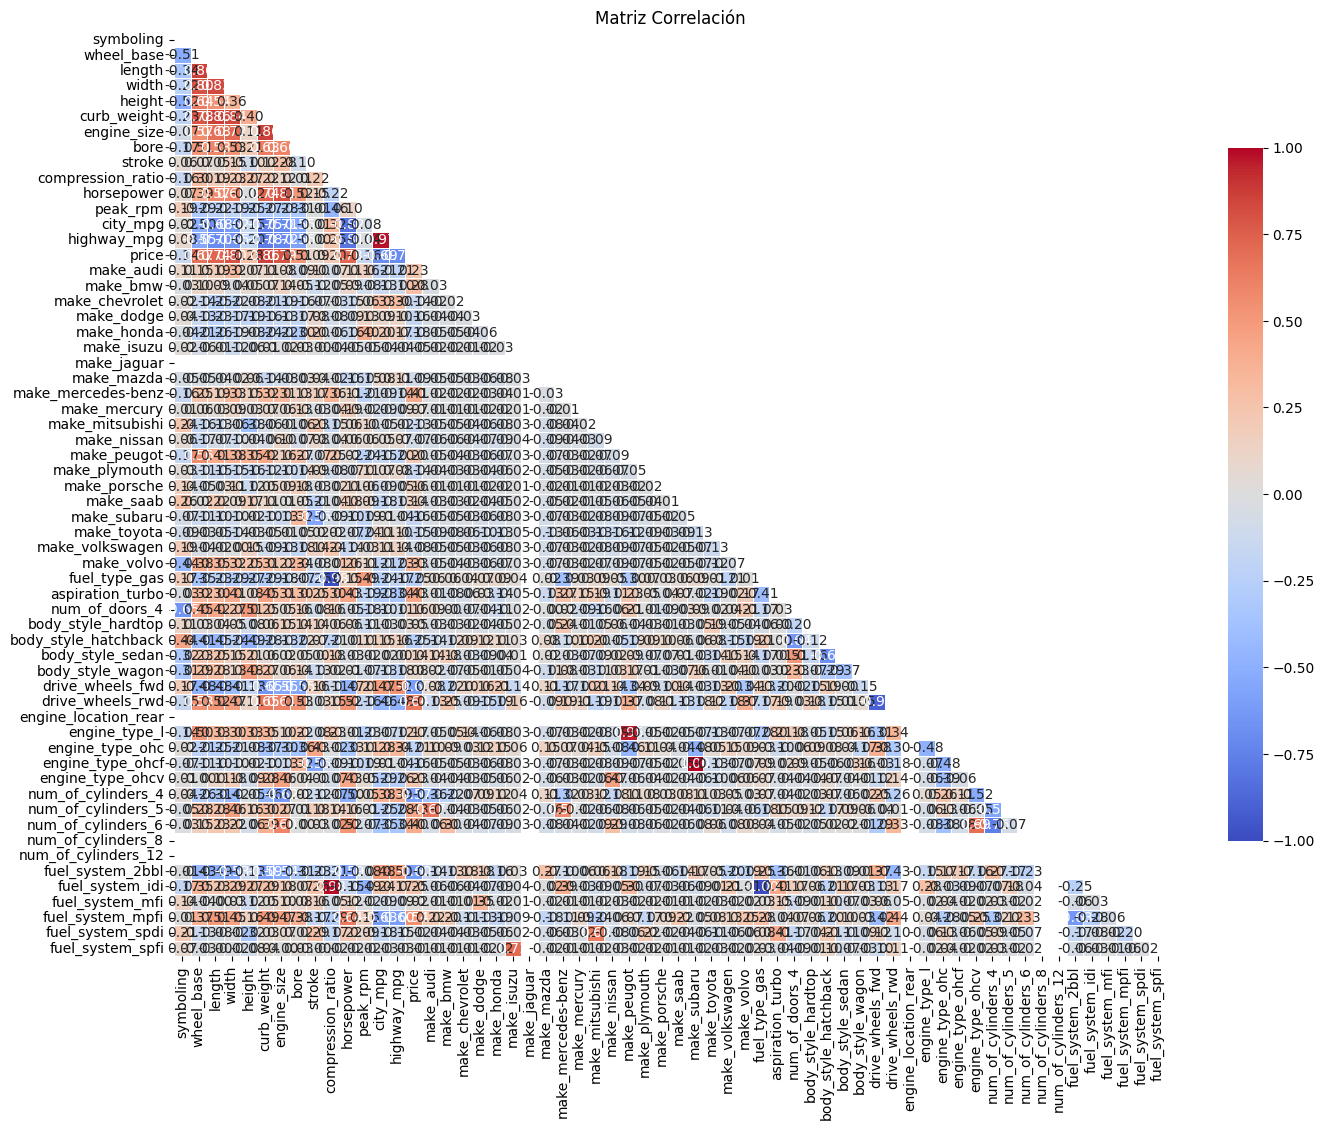

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# el tamaño de la figura
plt.figure(figsize=(16, 12))

#  máscara para ocultar la mitad superior de la matriz
mask = np.triu(np.ones_like(df_sin_outliers.corr(), dtype=bool))

# Crear el heatmap con la máscara y colores
sns.heatmap(df_sin_outliers.corr(), mask=mask, annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.75})

plt.title('Matriz Correlación')
plt.show()



In [ ]:
# Ver las variables más correlacionadas con 'price'
corr_matrix = df_sin_outliers.corr()
target_corr = corr_matrix['price'].sort_values(ascending=False)

# Mostrar las variables más correlacionadas con 'price'
target_corr


,price
price,1.000000
curb_weight,0.858247
width,0.796318
engine_size,0.791822
length,0.738637
horsepower,0.725647
wheel_base,0.674585
drive_wheels_rwd,0.640758
fuel_system_mpfi,0.539915
bore,0.507932


In [ ]:
                        #Variables altamente correlacionadas con price:
    #curb_weight  -> 0.86
    #width  -> 0.80
    #engine_size  -> 0.79
    #length  -> 0.74
    #horsepower  -> 0.73
                      #Variables con correlación negativa:
    #city_mpg  -> -0.69
    #highway_mpg  -> -0.70
df_sin_outliers.to_csv("dataset_tratado.csv", index=False)   #Guardar el dataset tratado